# Proyecto final - 15% del semestral

Grupo N°9

Integrantes:
Cineyris,
Nicole Valdés,
Emanuel González,
Alexander

Salón: 1IE-436
Entrega: 06 de marzo, 2025

## Tema: Eliminación de ruido en grabación de voz con transformada de Z (opción 1)

In [29]:
#Importación de librerías

import numpy as np
import scipy.signal as signal
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
import IPython.display as ipd
from scipy.linalg import toeplitz

In [30]:
print("Librerias cargadas exitosamente")

Librerias cargadas exitosamente


In [31]:
#Cargar el archivo de audio
sample_rate, audio = wav.read("Testing.wav")

In [32]:
print("Audio subido correctamente")

Audio subido correctamente


In [33]:
#Convertir a mono si es estéreo
if len(audio.shape) > 1:
    audio = np.mean(audio, axis=1)

In [34]:
#Normalizar el audio
audio = audio / np.max(np.abs(audio))

In [42]:
#Diseño del filtro digital (Ejemplo: Pasa-bajo Butterworth)
#cutoff_freq = 3000  # Frecuencia de corte en Hz
#order = 6  # Orden del filtro
#b, a = signal.butter(order, cutoff_freq / (sample_rate / 2), btype='low', analog=False)


#lineNEL - eliminar si no funciona

# --- Filtro Adaptativo basado en la Transformada Z con Regularización ---
# Diseño de un filtro Wiener en el dominio Z para minimizar el ruido no deseado
def wiener_filter(signal, noise_estimation, filter_order=10, regularization=1e-5):
    r = np.correlate(noise_estimation, noise_estimation, mode='full')
    r = r[len(r)//2:len(r)//2 + filter_order]
    R = toeplitz(r) + regularization * np.eye(filter_order)  # Regularización para evitar singularidad
    p = np.correlate(noise_estimation, signal, mode='full')
    p = p[len(p)//2:len(p)//2 + filter_order]
    w = np.linalg.solve(R, p)  # Resolución estable en lugar de invertir
    return signal - np.convolve(signal, w, mode='same')

In [43]:
# Estimación del ruido inicial (primeros 1000 samples considerados como ruido)
noise_estimation = audio[:1000]

In [44]:
# Aplicar filtro Wiener en el dominio Z
audio_filtrado = wiener_filter(audio, noise_estimation)

In [45]:
# Aplicar un filtro pasa-banda para realzar la voz (300 Hz - 3400 Hz)
lowcut = 300 / (sample_rate / 2)
highcut = 3400 / (sample_rate / 2)
b, a = signal.butter(6, [lowcut, highcut], btype='band')
audio_filtrado = signal.filtfilt(b, a, audio_filtrado)

In [47]:
# Aplicar el filtro al audio
#audio_filtrado = signal.filtfilt(b, a, audio)

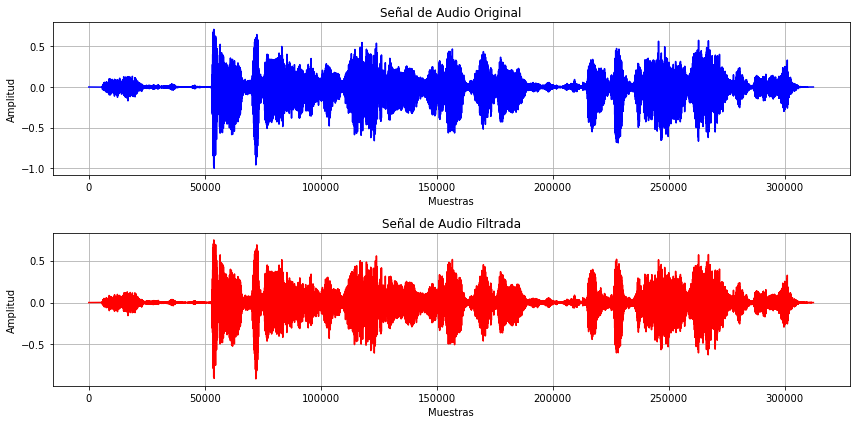

In [48]:
# Graficar las señales antes y después del filtrado
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(audio, color='blue')
plt.title("Señal de Audio Original")
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(audio_filtrado, color='red')
plt.title("Señal de Audio Filtrada")
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
plt.grid()

plt.tight_layout()
plt.show()

In [49]:
# Guardar el audio filtrado en formato compatible con Jupyter Notebook
from scipy.io.wavfile import write
import os

output_filename = "Testing.wav"
write(output_filename, sample_rate, (audio_filtrado * 32767).astype(np.int16))

In [50]:
# Mostrar enlaces de descarga en Jupyter Notebook
import IPython
from IPython.display import display, Audio, FileLink

display(Audio(output_filename, rate=sample_rate))
display(FileLink(output_filename))

C:\Users\Panama2021\Downloads\denoising\Testing.wav